# Guía 1 - Análisis Exploratorio de Datos

## 1. Introducción

El objetivo de este notebook es que hagamos un repaso de las herramientas del ecosistema de datos de Python y, de paso, que comiencen a familiarizarse con el dataset que utilizaremos en las primeras clases. Si alguno/a siente que necesita un repaso más fuerte de Python, dejamos dos notebooks y algunas referencias que pueden utilizar en la Guia 0.

Durante las primeras clases vamos a trabajar con el dataset de Pingüinos del Archipiélago Palmer que ya les hemos presentado. Vamos a dar los primeros pasos dentro de la larga lista de pasos que hacen a un proyecto exitoso de Aprendizaje Automático. El nombre de esta etapa es conocido como Análisis Exploratorio de Datos, y puede ser una de las etapas más entretenidas e instructivas del proceso. Lo que vamos a hacer hoy, entonces, es:

1. Conseguir y abrir los datos.
1. Explorar y visualizar los datos para comenzar a conocer el dataset. Para ello, es importante tener en la cabeza estas preguntas para guiar el trabajo:
    * ¿Qué preguntas podríamos responder con este dataset?¿En qué problemas podemos trabajar?
    * ¿Qué atributos pueden ser útiles?
    * ¿Necesitamos datos adicionales?

### Consigna

Les dejamos una guía preliminar para que comiencen a trabajar. Muchos de esos pasos son generales a cualquier proyecto de Ciencia de Datos. Por ese motivo, es importante ser criteriosos/as para saber cuáles son pertinentes y cuáles no en cada proyecto.

**Ejercicio**: Explora el origen de este conjunto de datos. ¿Quién lo construyó, cómo y cuándo? ¿Con qué objetivo?

**Ejercicio**: importa las liberías que utilizaremos. Asegurate de tenerlas todas instaladas en el ambiente que creaste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Ejercicio**. Abrir los datos con Pandas y responder:

* ¿Qué tipo de archivo es?
* Imprima sus primeros cinco elementos.

_Pista: Considere el uso de metodos `pd.read_csv()`, `.head()`. Puede ver su documentacion colocando el signo `?` luego del metodo y ejecutando la celda, e.g. `pd.read_csv?`._


In [59]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Lic. en Datos/IAA/datos/penguins_size.csv')  #drive mica
data.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
160,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE


**Ejercicio:** ¿Cuántas columnas tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Pistas: `.shape`, `.columns`.


In [8]:
print(data.shape)
data.columns

(344, 7)


Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

**Ejercicio:** ¿Qué tipo de datos tiene el dataset?¿Hay datos faltantes? Pistas: `.info()`, `.isna()`.

In [21]:
data.info()
print('\nDatos faltantes')
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Datos faltantes


,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


**Ejercicio:** ¿Cuántas especies hay?¿Cuántas instancias por especie?¿Cuál es el promedio y desviación estándar de peso por especie?¿Y de las otras variables numéricas?

Pista: las funciones `.nunique()`, `.value_counts()` y `.groupby()` pueden ser útiles.

In [25]:
print(data["species"].unique())
print(data["species"].value_counts())

['Adelie' 'Chinstrap' 'Gentoo']
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [15]:
print(data.value_counts())
data.nunique()

species  island     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5              18.1             187.0              2900.0       FEMALE    1
Gentoo   Biscoe     44.0              13.6             208.0              4350.0       FEMALE    1
                    43.6              13.9             217.0              4900.0       FEMALE    1
                    43.5              15.2             213.0              4650.0       FEMALE    1
                                      14.2             220.0              4700.0       FEMALE    1
                                                                                                ..
Adelie   Torgersen  36.6              17.8             185.0              3700.0       FEMALE    1
                    36.2              17.2             187.0              3150.0       FEMALE    1
                                      16.1             187.0              3550.0       FEMALE    1
               

,0
species,3
island,3
culmen_length_mm,164
culmen_depth_mm,80
flipper_length_mm,55
body_mass_g,94
sex,3


**Ejercicio:** Define al menos tres tareas que podemos realizar con este dataset.

**Ejercicio:** realizar un histograma para cada variable numérica. Luego, repetir el gráfico, pero haciendo un histograma de cada variable desagregando por cada especie. Interpreta y analiza si el atributo es útil para separar las especies.

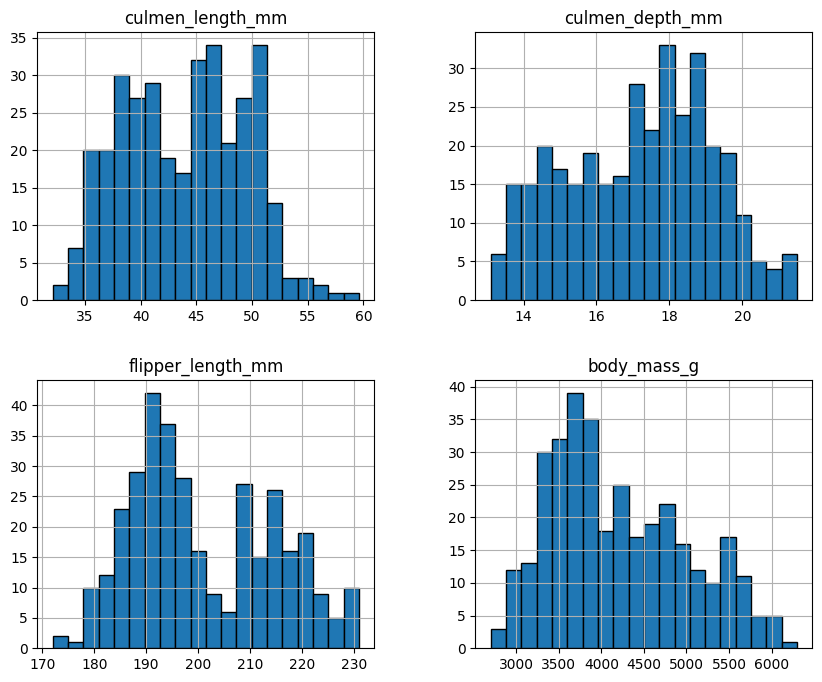

In [44]:
data.hist(figsize=(10, 8), bins=20, edgecolor="black")
plt.show()
#data.body_mass_g.hist(bins=20, rwidth=0.9)#muestra solo una variable
#plt.xlabel('Peso (g)')
#plt.ylabel('Cuentas');

num_cols = data.select_dtypes(include=['float64', 'int64']).columns #DEFINIR COLUMNAS NUMERICAS

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=col, hue="species", bins=20, kde=True, alpha=0.5)
    plt.title(f"Histograma de {col} por especie")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

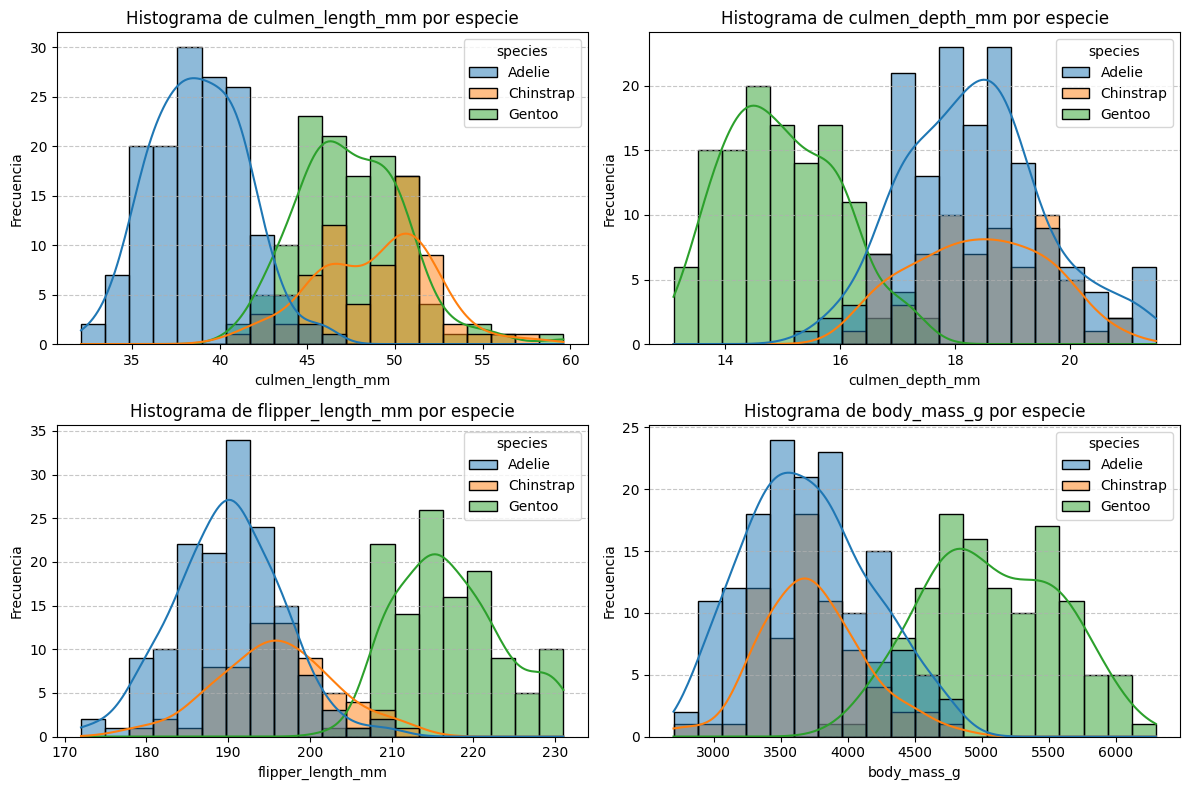

In [43]:
n_cols = 2  # 2 columnas
n_rows = (len(num_cols) + 1) // n_cols  # Calcula filas necesarias

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Asegura que los ejes sean un array 1D para fácil iteración

# Graficar cada histograma en su posición correspondiente
for i, col in enumerate(num_cols):
    sns.histplot(data=data, x=col, hue="species", bins=20, kde=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Histograma de {col} por especie")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Eliminar los gráficos vacíos si hay menos de 4 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar los espacios entre gráficos
plt.show()

**Ejercicio:** realizar un histograma para cada variable numérica. Luego, repetir el gráfico, pero haciendo un histograma de cada variable desagregando por cada género. Interpreta y analiza si el atributo es útil para separar los géneros.

In [62]:
print(data["sex"].value_counts())

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [58]:
data.sample(5)

AttributeError: 'NoneType' object has no attribute 'sample'

In [61]:
data.drop(data[data['sex'] =='.'].index, inplace=True) #elimina y queda guardado
#print(data["sex"].value_counts())

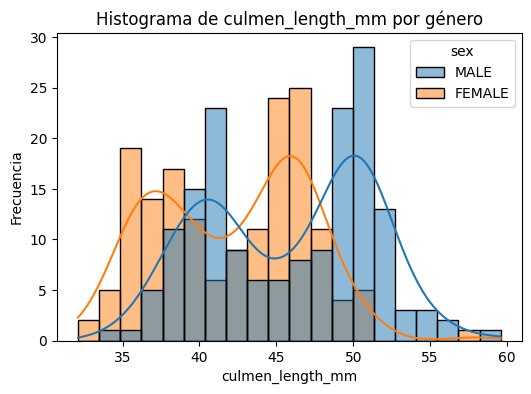

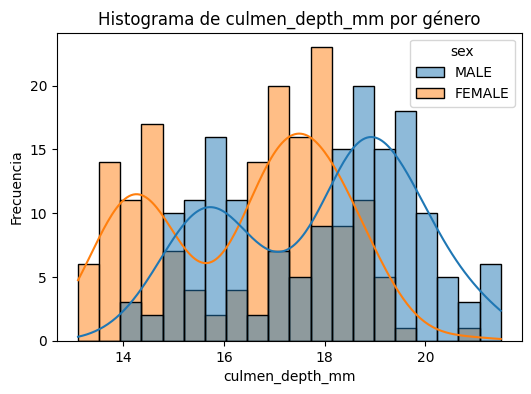

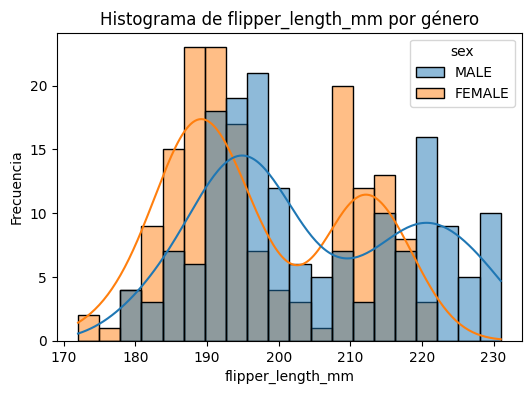

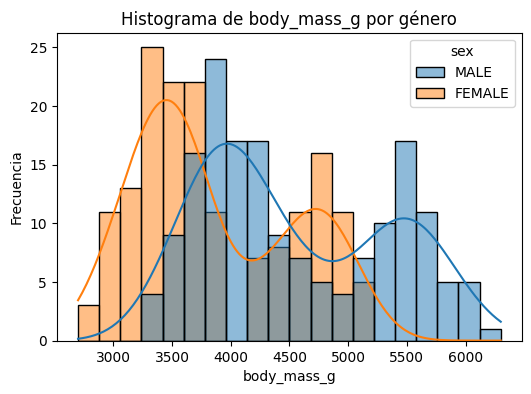

In [63]:
colores = {"MALE": "blue", "FEMALE": "red"}
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, hue="sex", bins=20, kde=True, alpha=0.5)
    plt.title(f"Histograma de {col} por género")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

**Ejercicio:** Explora la relación entre las variables numéricas, por ejemplo, con gráficos de dispersión (*scatter*). Puede ser útil *pintar* los puntos según a qué especie pertenecen o a qué género. Interpreta y analiza si esos atributos son útiles para separar los géneros o especies. Elige los que te parezcan los mejores pares de atributos para cada caso. ¿Son los mismos atributos para ambas tareas? Pista: la función `sns.pairplot` puede ser muy útil. Ten en cuenta el `hue`.

Scatter con categórica sex


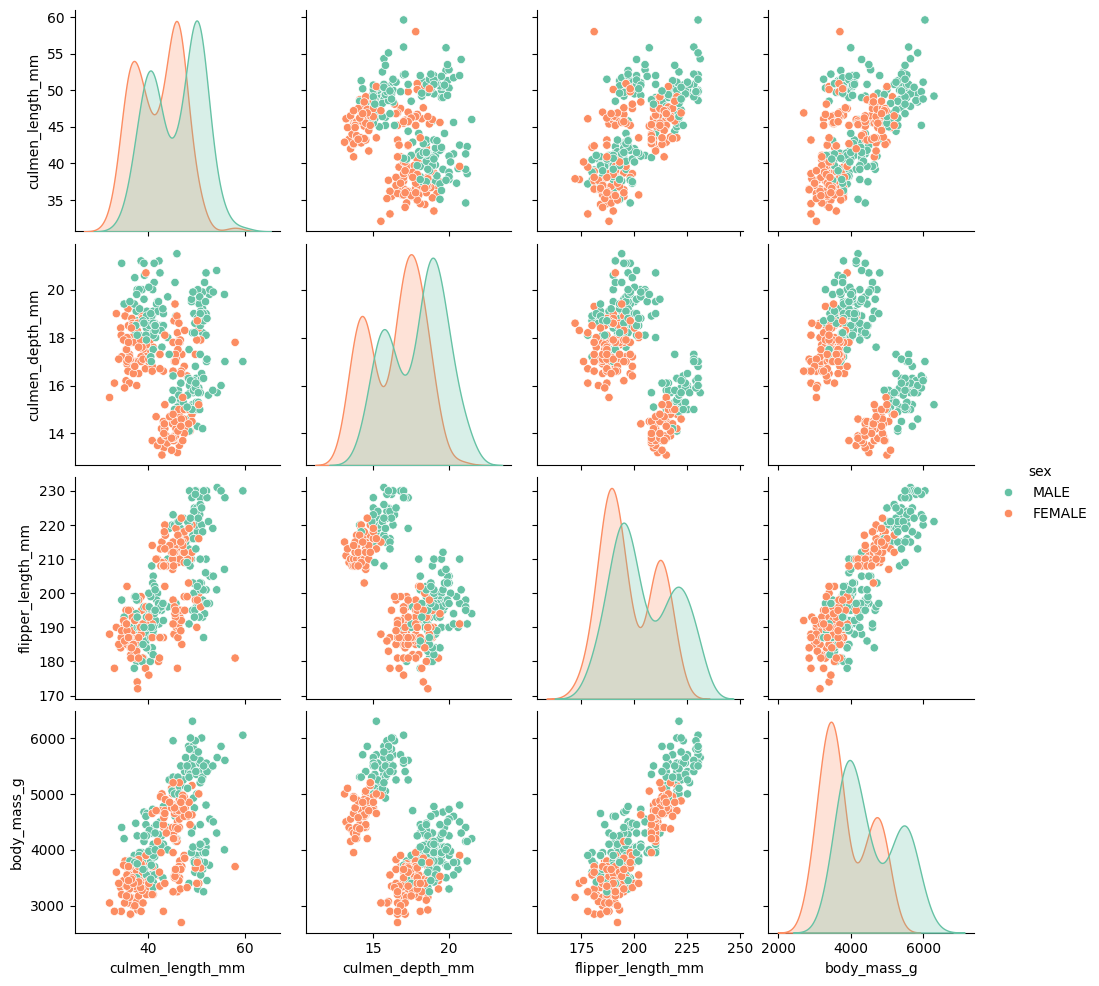


 Scatter con categórica species


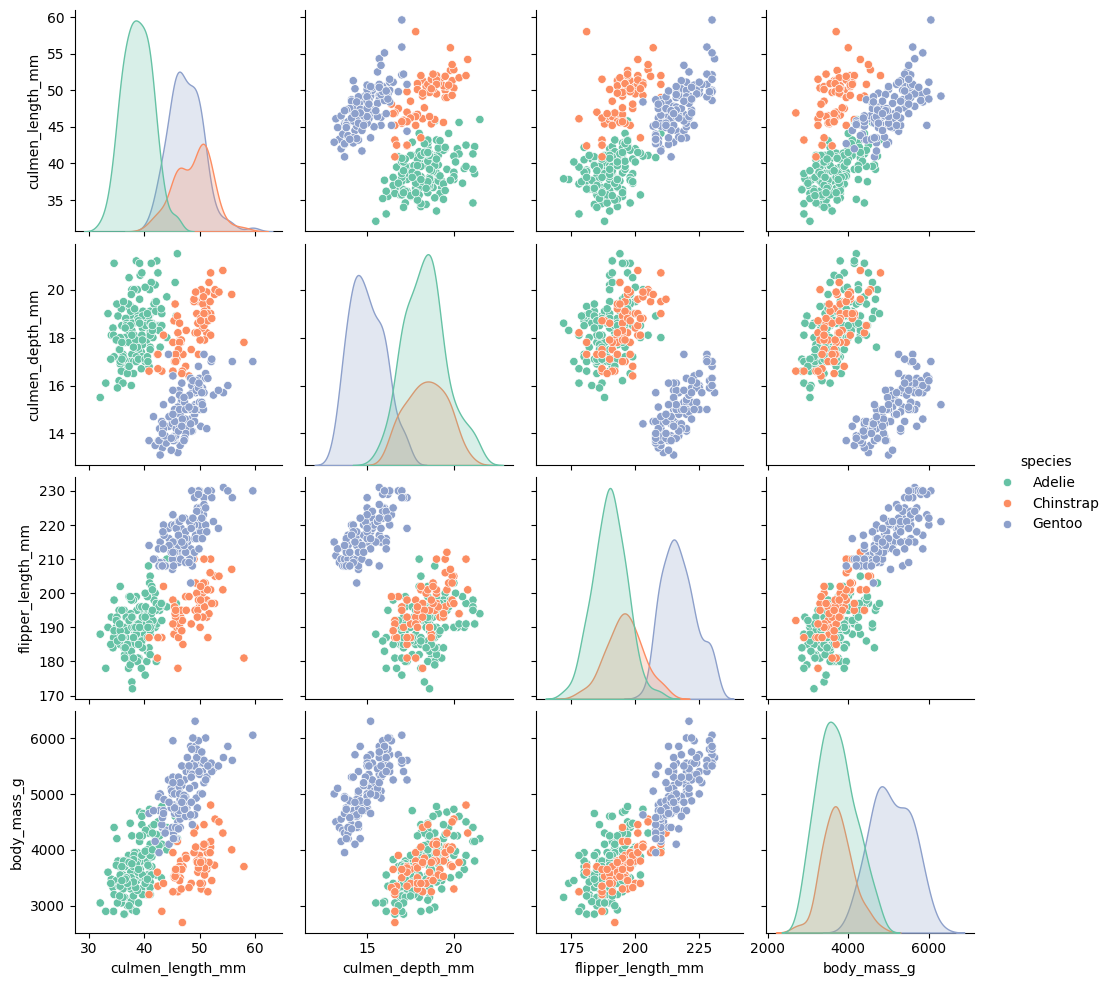

In [67]:
print('Scatter con categórica sex')
sns.pairplot(data, hue="sex", diag_kind="kde", palette="Set2")
plt.show()
print('\n Scatter con categórica species')
sns.pairplot(data, hue="species", diag_kind="kde", palette="Set2")
plt.show()


In [ ]:
# COMPLETAR

### Más ejercicios

**Ejercicio:** ¿Qué es el aprendizaje supervisado? Explica con tus palabras, y pon ejemplos de algunas aplicaciones. Utiliza la bibliografía recomendada.

**Ejercicio:** ¿Cuál es la diferencia entre regresión y clasificación? Explica con tus palabras, y pon al menos un ejemplo de cada caso. Para esos ejemplos, decide si es más importante *predecir* o *inferir*. Utiliza la bibliografía recomendada.

**Ejercicio:** Decide si los siguientes problemas son problemas de clasificación o de regresión. Luego, elige tres de los problemas y describe qué tipo de atributos podrían ser útiles para resolverlos y cómo los conseguirías. Finalmente, para esos tres casos, considera escenarios donde puede ser más importante *predecir* o *inferir*.
1. Predecir el precio de una casa.
1. Predecir si un estudiante aprueba o no un examen.
1. Predecir si un tumor es maligno o benigno.
1. Predecir la nota de un examen.
1. Predecir la edad de una persona.
1. Predecir el color de pelo de una persona.
1. Predecir la altura de una persona.
1. Predecir el valor de una acción financiera dentro de un día.
1. Predecir si el valor de una acción financiera de un día será mayor o menor que la del día anterior.

**Ejercicio - Muy importante:** Explora el [repositorio de Machine Learning de la Universidad de California Irvine (UCI)](https://archive.ics.uci.edu/) y elige un conjunto de datos que te resulte interesante. Realiza un análisis exploratorio similar al que hicimos en este notebook. ¿Te gusta el dataset?¿Por qué?¿Qué tipo de preguntas podrías responder con él?¿Qué tipo de problemas podrías resolver? Considera este dataset para tu proyecto final.